# Objetivo
Implementar un AG para encontrar los valores que minimizan la funcion Ackley en 2 variables.
$f(x) = -20\exp\left(-0.2\sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}\right) - \exp\left(\frac{1}{n} \sum_{i=1}^{n} \cos(n\pi x_i)\right) + 20 + e$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:


def ackley_fitness(X, a=20.0, b=0.2):
    """
    Función de Ackley (variante con cos(n*pi*x_i)) para usar como función objetivo.

    Acepta:
      - X shape (r,)        -> r individuos 1D (n=1)
      - X shape (r,n)       -> r individuos de n variables
      - (x1, x2, ..., xn)   -> tuplas/listas de arrays (se apilan por columnas)

    Retorna:
      - ndarray shape (r,) con f(x) por individuo.
    """
    # Si me pasan (x1, x2, ...) los convierto en matriz de (r,n)
    if isinstance(X, (list, tuple)) and len(X) > 0 and np.ndim(X[0]) == 1:
        X = np.column_stack(X)

    X = np.asarray(X, dtype=float)

    # Si es solo un vector 1D, conviértelo en matriz (r,1) para unificar lógica
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n = X.shape[1]  # número de variables (1 o 2)
    sum_sq = np.sum(X**2, axis=1)
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / n))
    term2 = -np.exp(np.sum(np.cos(n * np.pi * X), axis=1) / n)
    return term1 + term2 + a + np.e

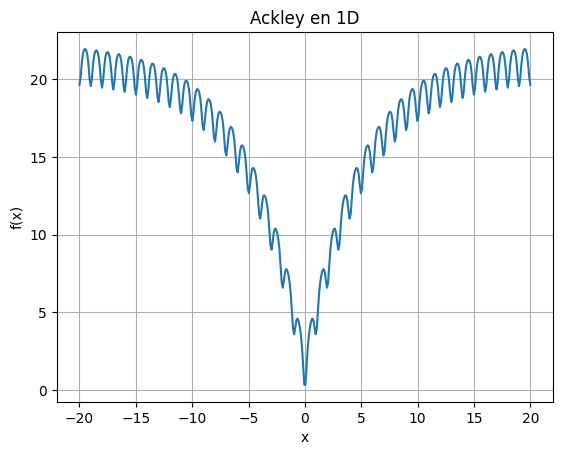

In [50]:

def fx(X):
    return ackley_fitness(X)


# Dominio en 1D
x = np.linspace(-20, 20, 400)
x1 = np.linspace(-20, 20, 400)

# Evaluar punto por punto usando una lista de arrays 1D
y = fx((x,x1))

# Graficar
plt.plot(x, y)
plt.title("Ackley en 1D")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [22]:
# Funcion para crear una poblacion de individuos en representacion binaria
def iniPobli(n,l):
  '''
  n: numero de individuos (tamanio de la poblacion)
  l: longitud de los cromosomas
  '''
  poblacion = np.random.randint(0,2,size=(n,l))
  return poblacion

In [23]:
P = iniPobli(10,8)
print(P)

[[0 1 1 1 0 0 1 1]
 [0 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 0 0]
 [1 0 0 1 0 1 1 0]
 [0 0 0 1 0 0 1 1]
 [1 1 0 0 1 0 0 1]
 [1 1 0 1 1 0 0 0]
 [0 0 0 1 1 0 1 0]]


In [24]:
# Funcion para decodificar de binario a decimal los individuos
def decodificar(poblacion,Imin,Imax):
  '''
  poblacion: poblacion de individuos en binario
  Imin: intervalo minimo de la poblacion
  Imax: intervalo maximo de la poblacion
  '''
  [r,c] = poblacion.shape
  decimal = np.zeros(r)
  decimal_reescalado = np.zeros(r)
  for i in range(r):
    for j in range(c):
      # Transformar de binario a entero
      decimal[i] = decimal[i] + poblacion[i,j]*2**(c-j-1)
      # Se reescala el valor decimal en el espacio de busqueda
      decimal_reescalado[i] = (Imax-Imin)*decimal[i]/(2**c-1) + Imin

  return decimal_reescalado

In [25]:
x = (decodificar(P,0,2))
print(x)

[0.90196078 0.0627451  1.4745098  0.38431373 0.87843137 1.17647059
 0.14901961 1.57647059 1.69411765 0.20392157]


In [26]:
# Funcion para obtener las aptitudes (Fitness) de los individuos
def fitness(poblacion, Imin, Imax):
  '''
  poblacion: poblacion de individuos en binario
  Imin: intervalo minimo de la poblacion
  Imax: intervalo maximo de la poblacion
  '''
  [r,c] = poblacion.shape
  x = decodificar(poblacion,Imin,Imax)
  fitness = fx(x) #Funcion objetivo
  return fitness

In [27]:
p = iniPobli(10,8)
print(fitness(p,0,2))

[-4.80419296 -6.89848489 -6.9034362  -6.55477175 -6.8832923  -6.46477573
 -3.13289451 -6.8832923  -6.70393129 -4.80419296]


In [28]:
# Funcion que realiza la cruza de individuos
def cruza(poblacion,pc):
  '''
  poblacion: poblacion de individuos en binario
  pc: pares de cromosomas
  '''
  [r,c] = poblacion.shape
  if pc>r/2:
    raise ValueError('El numero de padres no puede ser mayor que la mitad de la poblacion')
  M = np.zeros((int(2*pc),c))
  for i in range(int(pc)):
    r1 = np.random.randint(0,r,size=(1,2)) # PAr de numeros aleatorios para selecionar padres
    # Numero aleatorio para elegir el punto de cruza
    r2 = np.random.randint(0,c)

    # Seleccionamos los padres a cruzar
    padre1 = poblacion[r1[0,0],:]
    padre2 = poblacion[r1[0,1],:]

    # Realizamos la cruza
    hijo1 = np.concatenate((padre1[0:r2],padre2[r2:]))
    hijo2 = np.concatenate((padre2[0:r2],padre1[r2:]))

    # Añadimos los hijos a la poblacion
    M[2*i,:] = hijo1
    M[2*i+1,:] = hijo2
  return M

In [29]:
p = iniPobli(10,8)
cruzados = cruza(p,5)
print(cruzados)
print(p)

[[0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0.]]
[[1 1 1 0 1 0 0 0]
 [0 1 1 0 0 0 1 1]
 [0 1 1 1 0 1 1 1]
 [0 0 1 1 1 0 1 1]
 [1 1 0 1 1 0 1 1]
 [1 1 1 0 1 0 0 0]
 [0 1 1 1 0 0 1 1]
 [0 1 1 0 1 0 0 0]
 [1 1 0 0 1 1 1 1]
 [0 0 1 0 0 1 1 0]]


In [30]:
def mutacion_puntual(poblacion, pm):
    [r, c] = poblacion.shape
    total_genes = r * c
    n_mutaciones = int(pm * total_genes)  # cuántos genes mutar en toda la población

    for _ in range(n_mutaciones):
        r1 = np.random.randint(0, r)  # individuo aleatorio
        r2 = np.random.randint(0, c)  # gen aleatorio
        poblacion[r1, r2] = 1 - poblacion[r1, r2]
    return poblacion


In [31]:
# Funcion que realiza el proceso de seleccion por ranking
def seleccion_ranking(poblacion,ps):
  '''
  poblacion: poblacion de individuos en binario
  ps: probabilidad de seleccion
  '''
  [r,c] = poblacion.shape
  Pnew = np.zeros((r,c))
  n  = int(ps*r)
  aptitud = fitness(poblacion, Imin, Imax).reshape(r,1)
  Pob_ampliada = np.concatenate([poblacion,aptitud],axis=1)
  indices = np.argsort(Pob_ampliada[:,-1])
  Pob_ordenada = Pob_ampliada[indices]
  Pob_ordenada_seleccionada = Pob_ordenada[0:n,:]
  Pob_ordenada_seleccionada_final = Pob_ordenada_seleccionada[:,0:c]
  for i in range(r):
    for j in range(c):
      if (i<n):
        Pnew[i,j] = Pob_ordenada_seleccionada_final[i,j]
      else:
        Pnew[i,j] = np.random.randint(0,2)
  return Pnew


In [32]:
# Seleccion por torneo
def seleccion_torneo(poblacion, Imin, Imax,k : int):
  '''
  poblacion: poblacion de individuos en binario
  k: Tamanio del torneo
  '''
  [r,c] = poblacion.shape
  aptitud = fitness(poblacion, Imin, Imax).reshape(r,1)
  M = np.concatenate([poblacion,aptitud],axis=1)

  # Seleccionamos los k individuos
  indices = np.random.choice(r,size=k,replace=False)
  torneo = M[indices,:]
  # Ordenamos ppor aptitud descendente
  indices = np.argsort(torneo[:,-1])[::-1]
  torneo_ordenado = torneo[indices]
  # Seleccionamos el mejor individuo
  mejor_individuo = torneo_ordenado[0,0:c]
  return mejor_individuo

In [33]:
# Poblacion con torneo
def nueva_poblacion_torneo(poblacion,Imin,Imax,k:int):
  '''
  poblacion: poblacion de individuos en binario
  k: Tamanio del torneo
  '''
  [r,c] = poblacion.shape
  Pnew = np.zeros((r,c))
  for i in range(r):
    Pnew[i,:] = seleccion_torneo(poblacion, Imin, Imax,k)
  return Pnew

In [34]:
# Seleccion por ruleta
def seleccion_ruleta(poblacion,Imax,Imin):
  '''
  poblacion: poblacion de individuos en binario
  Imax: Intervalo maximo de la poblacion
  Imin: Intervalo minimo de la poblacion
  '''
  [r,c] = poblacion.shape
  aptitud = fitness(poblacion, Imin, Imax)
  min_fitness = np.min(aptitud)
  if min_fitness<0:
    aptitud = aptitud - min_fitness + 1e-6
  # Evitemos dividir por 0
  if np.sum(aptitud)==0:
    probs = np.ones(r)/r
  else:
    probs = aptitud/np.sum(aptitud)
  acumuladas = np.cumsum(probs)
  # Generamos un numero aleatorio para simular la rotacion de la ruleta
  num = np.random.rand()
  # Se busca el indiviuo donde cae num
  for i in range(r):
    if num<acumuladas[i]:
      ganador = poblacion[i,:]
      break
  return ganador

In [35]:
# Nueva población por ruleta
def nueva_poblacion_ruleta(poblacion,min,max):
    [renglones,columnas] = poblacion.shape
    nueva_poblacion = np.zeros((renglones,columnas))

    for i in range(renglones):
        nueva_poblacion[i,:] = seleccion_ruleta(poblacion,min,max)
    return nueva_poblacion

In [36]:
# Implementamos un algoritmo genetico completo

print('Algoritmo genetico (Representacion binaria)\n')

# Parametros de arranque
n = 100 #individuos
l = 8 #Genes para cada cromosoma
generaciones = 100
ps = 0.6 # Porcentaje de seleccion
pc = n/2 # par de cromosomas a cruzar
pm = 0.05 #Porcentaje de mutacion
Imin = 0
Imax = 2

# Algoritmo genetico
p = iniPobli(n,l)
for i in range(generaciones):
  c = cruza(p,pc)
  m = mutacion_puntual(c,pm)
  #Pnew = seleccion_ranking(m,ps)
  #Pnew = nueva_poblacion_torneo(m,Imin,Imax,5)
  Pnew = nueva_poblacion_ruleta(m,Imax,Imin)
  p = Pnew.copy()

# Resultados
final_fitness = fitness(Pnew, Imin, Imax)
mejor_individuo_index = np.argmax(final_fitness)
x_mejor = decodificar(Pnew, Imin, Imax)[mejor_individuo_index]

print(f'El mejor individuo es {Pnew[mejor_individuo_index,:]}')
print(f'El valor de x que maximiza la funcion: {x_mejor}')
print(f'El valor maximo de la funcion es: {final_fitness[mejor_individuo_index]}')

Algoritmo genetico (Representacion binaria)

El mejor individuo es [0. 0. 0. 0. 0. 0. 0. 0.]
El valor de x que maximiza la funcion: 0.0
El valor maximo de la funcion es: -4.440892098500626e-16


# Algoritmo Genetico (Representacion real)

In [37]:
n = 100
l = 1
generaciones = 50
ps = 0.6 # Porcentaje de seleccion
pc = 0.5 # Porcentaje de cromosoma
pm = 0.05 # Porcentaje de mutacion
Imin = -2
Imax = 2

########### Funciones ###############
#Funcion para crear individuos
def iniPobli(n,l,Imin,Imax):
  '''
  n: numero de individuos (tamanio de la poblacion)
  l: longitud de los cromosomas
  Imin: intervalo minimo de la poblacion
  Imax: intervalo maximo de la poblacion
  '''
  poblacion = np.random.uniform(Imin,Imax,size=(n,l))
  return poblacion

def fitness(poblacion):
  fitness = fx(poblacion)
  return fitness

def cruza(poblacion,pc,Imin,Imax):
  [r,c] = poblacion.shape
  n = int(pc*r)
  M = np.zeros((r,1))

  for i in range(n):
    r1 = np.random.randint(0,r,size=(1,2))
    Padre1 = poblacion[r1[0,0],0]
    Padre2 = poblacion[r1[0,1],0]
    alpha = np.random.rand()
    hijo1 = alpha*Padre1 + (1-alpha)*Padre2
    hijo2 = (1-alpha)*Padre1 + alpha*Padre2
    # Mantenemos a los individuos dentro del espacio de busqueda
    hijo1 = np.clip(hijo1,Imin,Imax)
    hijo2 = np.clip(hijo2,Imin,Imax)
    # Se guardan los descendientes
    M[2*i,0] = hijo1
    M[2*i+1,0] = hijo2

  for i in range(r):
    if M[i,0]==0:
      M[i,0] = np.random.uniform(Imin,Imax)

  return M

def mutacion(poblacion,pm,Imin,Imax,beta=0.05):
  [r,c] = poblacion.shape
  sigma = beta*(Imax-Imin)
  n = int(np.ceil(pm*r))
  for i in range(n):
    r1 = np.random.randint(0,r)
    N = np.random.normal(0,sigma)
    poblacion[r1,0] = poblacion[r1,0] + N
    poblacion[r1,0] = np.clip(poblacion[r1,0],Imin,Imax)
  return poblacion

def seleccion_ranking(poblacion,Imin,Imax,ps):
  '''
  poblacion: poblacion de individuos en binario
  ps: probabilidad de seleccion
  '''
  [r,c] = poblacion.shape
  Pnew = np.zeros((r,1))
  n  = int(ps*r)
  aptitud = fitness(poblacion).reshape(r,1)
  Pob_ampliada = np.concatenate([poblacion,aptitud],axis=1)
  indices = np.argsort(Pob_ampliada[:,-1])[::-1]
  Pob_ordenada = Pob_ampliada[indices]
  Pob_ordenada_seleccionada = Pob_ordenada[0:n,:]
  Pob_ordenada_seleccionada_final = Pob_ordenada_seleccionada[:,0]
  for i in range(r):
    if (i<n):
      Pnew[i] = Pob_ordenada_seleccionada_final[i]
    else:
      Pnew[i] = np.random.uniform(Imin,Imax)
  return Pnew

################ algoritmo Genetico ##############
p = iniPobli(n,l,Imin,Imax)
for i in range(generaciones):
  c = cruza(p,pc,Imin,Imax)
  m = mutacion(c,pm,Imin,Imax)
  Pnew = seleccion_ranking(m,Imin,Imax,ps)
  p = Pnew.copy()

############### Resultados #######
x_mejor = Pnew[0,0]
print(f'El mejor individuo es {x_mejor}')
print(f'El valor maximo de la funcion es: {fx(x_mejor)}')

El mejor individuo es -0.0006095527824120199


ValueError: Entrada X debe ser (r,), (r,n) o una tupla/lista de columnas.

# Algoritmo Genetico Cauntico

Constriut una funcion para determinar el maximo de la funcion
$$f(x) = \mid \frac{x-5}{2+sin(x)} \mid$$

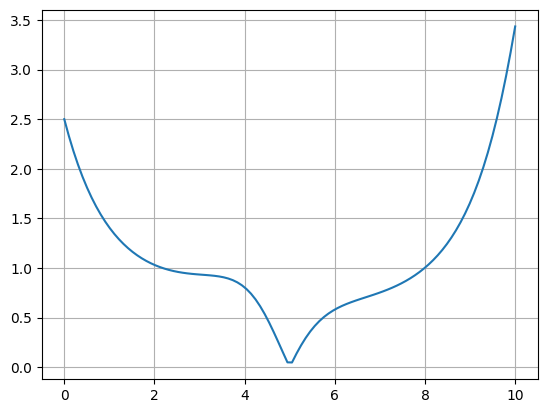

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fx = lambda x: abs((x-5)/(2+np.sin(x)))

x = np.linspace(0,10,100)
plt.plot(x, fx(x))
plt.grid()
plt.show()

In [ ]:
# Funcion que inicializa las amplitudes de probabilidad
# Al principio todas las amplitudes seran iguales 1/sqrt(2)

def amplitudes(tam_poblacion, num_qubits):
  '''
  tam_poblacion: Tamanio de la poblacion
  num_qubits: Numero de qubits
  '''
  pob_amp = np.full((tam_poblacion,num_qubits), 1/np.sqrt(2))
  return pob_amp
A = amplitudes(10,5)
A

array([[0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678],
       [0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678]])

In [ ]:
# Funcion que colapsa la poblacion de amplitudes a 0 y 1 mediante numeros aleatorios

def generar_soluciones(amplitud):
  r,c = amplitud.shape
  matriz_binaria = np.zeros((r,c), dtype=int)
  matriz_aleatoria = np.random.rand(r,c)
  for i in range(r):
    for j in range(c):
      if matriz_aleatoria[i,j] < amplitud[i,j]:
        matriz_binaria[i,j] = 1
      else:
        matriz_binaria[i,j] = 0
  return matriz_binaria

In [ ]:
generar_soluciones(A)

array([[1, 1, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [ ]:
# Funcion para evolucionar la poblacion de individuos mediante la rotacion
def rotation_gate(P,soluciones, mejor_solucion, theta = np.pi/50):
  r,c = P.shape
  for i in range(r):
    for j in range(c):

      if soluciones[i][j] != mejor_solucion:
        if mejor_solucion[j] == 1:
          P[i,j] = P[i,j] + np.sin(theta) * (1-P[i,j])
        else:
          P[i,j] = P[i,j] - np.sin(theta) * P[i,j]
  P = np.clip(P,0.05, 0.95)
  return P

In [ ]:
# Funcion que implementa el operador mutation-gate

def mutation_gate(P,pm):
  r,c = P.shape
  M_aux = np.random.rand(r,c)
  mascara = np.zeros((r,c), dtype=bool)
  for i in range(r):
    for j in range(c):
      if M_aux[i,j] < pm:
        mascara[i,j] = True
      else:
        mascara[i,j] = False
  P = np.where(mascara, 1-P, P)
  return P

In [ ]:
P = np.array([[0.5, 0.7, 0.2, 0.9],
              [0.3, 0.4, 0.6, 0.8],
              [0.9, 0.1, 0.5, 0.5]])

mutado = mutation_gate(P,0.05)
mutado

array([[0.5, 0.7, 0.2, 0.9],
       [0.3, 0.4, 0.6, 0.8],
       [0.9, 0.1, 0.5, 0.5]])

In [ ]:
# Algoritmo genetico cuantico
########### Parametros de inicio ##############
tam_pob = 6
num_qubits = 10
generacion = 10
pm = 0.05
Imin = -10
Imax = 10

################ Ejecucion ##############

P = amplitudes(tam_pob,num_qubits) # iniciar matriz de probablidades
mejor_solucion = None
mejor_fitness = float('inf')

for k in range(generacion):
  soluciones = generar_soluciones(P)
  print(soluciones)
  soluciones = decodificar(soluciones,Imin,Imax)
  aptitud = fx(soluciones)
  actual_mejor_fitness = np.min(aptitud)
  actual_mejor_solucion = soluciones[np.argmin(aptitud)]
  if actual_mejor_fitness < mejor_fitness:
    mejor_fitness = actual_mejor_fitness
    mejor_solucion = soluciones[np.argmin(aptitud)]
    print(mejor_solucion)
  print(soluciones)
  P = rotation_gate(P, soluciones, mejor_solucion)
  P = mutation_gate(P,pm)

print(f'El mejor individuo es {mejor_solucion}')
print(f'El valor minimo de la funcion es: {mejor_fitness}')

[[1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 0 1 1 0]
 [1 1 0 0 0 1 1 1 0 0]
 [1 0 1 1 1 1 1 1 1 1]]
4.995112414467252
[9.92179863 9.35483871 9.84359726 9.82404692 5.56207234 4.99511241]


IndexError: invalid index to scalar variable.